In [10]:
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt
from Bio import SeqIO
import os

In [11]:
ROOT_PATH    = '/'.join(os.getcwd().split(os.path.sep)[:-1])
DATASET_PATH = f'{ROOT_PATH}/dataset' 

In [12]:
dataset   = SeqIO.read(f'{DATASET_PATH}/fasta/MN908947.fna', 'fasta').seq

GC contents in dataset : 37.973 %


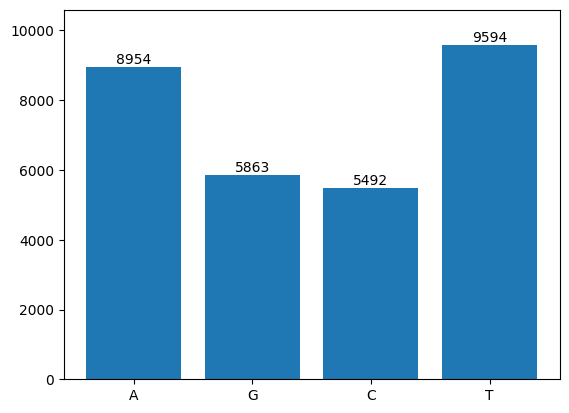

In [13]:
data_dist = {gene : dataset.count(gene) for gene in ['A', 'G', 'C', 'T']}

plt.bar(data_dist.keys(), data_dist.values())
plt.ylim(0, max(data_dist.values()) + 1000)

for k, v in data_dist.items():
    plt.text(k, v, v, ha = 'center', va = 'bottom')
    
print(f'GC contents in dataset : {(data_dist["G"] + data_dist["C"]) * 100 / len(dataset):.3f} %')

In [14]:
covid_DNA  = dataset[:100]
covid_mRNA = covid_DNA.transcribe()
amino_acid = covid_mRNA.translate()

print(f'DNA Sequence for dataset        | {covid_DNA}')
print(f'mRNA Sequence for dataset       | {covid_mRNA}')
print(f'Amino Acid Sequence for dataset | {amino_acid}')

DNA Sequence for dataset        | ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC
mRNA Sequence for dataset       | AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUC
Amino Acid Sequence for dataset | IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVT


/opt/conda/envs/bio/lib/python3.10/site-packages/Bio/Seq.py:3482: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [24]:
covid_mRNA_for_all = dataset.transcribe()
covid_amino_for_all = covid_mRNA_for_all.translate().split('*')

In [26]:
covid_amino_for_all = [amino for amino in covid_amino_for_all if len(amino) >= 50]
covid_amino_for_all

[Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN'),
 Seq('ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQA...VPL'),
 Seq('AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...LLV'),
 Seq('QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQL...EID'),
 Seq('TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADN...KTE')]

In [27]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

In [33]:
handle        = NCBIWWW.qblast('blastn', 'nt', dataset)
blast_records = NCBIXML.parse(handle)

In [32]:
for blast_record in blast_records:
    for idx, alignment in enumerate(blast_record.alignments[:10], 1):
        for hsp in alignment.hsps:
            if hsp.expect < E_VALUE_THRESHOLD:
                print(f'[{idx}]')
                print(f'alignment 제목 : {alignment.title}')
                print(f'alignment 길이 : {alignment.length}')
                print(f'E-Value        : {hsp.expect}')
                print(f'쿼리 염기서열   : {hsp.query[0:75]}')
                print(f'매칭           : {hsp.match[0:75]}')
                print(f'검색 결과      : {hsp.sbjct[0:75]}')
                print('\n')